# Plot the data
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to determine which part of the plot should be saved
from matplotlib.transforms import Bbox
# Used to navigate the directories and check for files
import os
# backup directory of this file, because the working directory is changed to save files
cor_mx_selected_counties_directory = os.getcwd()
# to print bold in math mode latex
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

C:\Users\leand\anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  del sys.path[0]


## Get the Data
Read the file ["Readme.ipynb"](Readme.ipynb) or check out the files ["get_data.ipynb"](get_data.ipynb) and ["get_geographical_data_of_german_counties.ipynb"](get_geographical_data_of_german_counties.ipynb) for more information about the data collection.

In [2]:
os.chdir(".."), os.chdir("..")   # move two directories up
%run color_scheme.ipynb
os.chdir("collect_data")
%run get_data.ipynb
os.chdir(cor_mx_selected_counties_directory)    # return to original directory

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!


## percentage of counties correlations with maximum at a shift of 0

In [3]:
number_of_correlations = 0
number_of_correaltion_with_peak_at_shift_0 = 0
for county in covid19.values():
    for correlation in county["correlation"].values():
        if np.argmax(correlation) == 50:
            number_of_correaltion_with_peak_at_shift_0 += 1
        number_of_correlations += 1
print(100*number_of_correaltion_with_peak_at_shift_0/number_of_correlations)
print(100*(number_of_correaltion_with_peak_at_shift_0-len(covid19.keys()))/(
      number_of_correlations))

8.70133848619097
8.458620039589029


In [4]:
print(number_of_correlations)
print(number_of_correaltion_with_peak_at_shift_0)

169744
14770


## Function to calculate the probability of correlations between two arrays

In [5]:
selected_counties = {"6633":"6611",
"7235":"7211",
"7337":"7313",
"7340":"7317",
"8125":"8121",
"8216":"8211",
"9187":"9163",
"9274":"9261",
"9278":"9263",
"9371":"9361",
"9374":"9363",
"9375":"9362",
"9471":"9461",
#9472:,
#9473:,
#9475:,
#9571:,
#9678:,
#9679:,
#9777:,
"9780":"9763",
"12069":"12051",
"12071":"12052",
"15088":"15002",
"16071":"16055"}

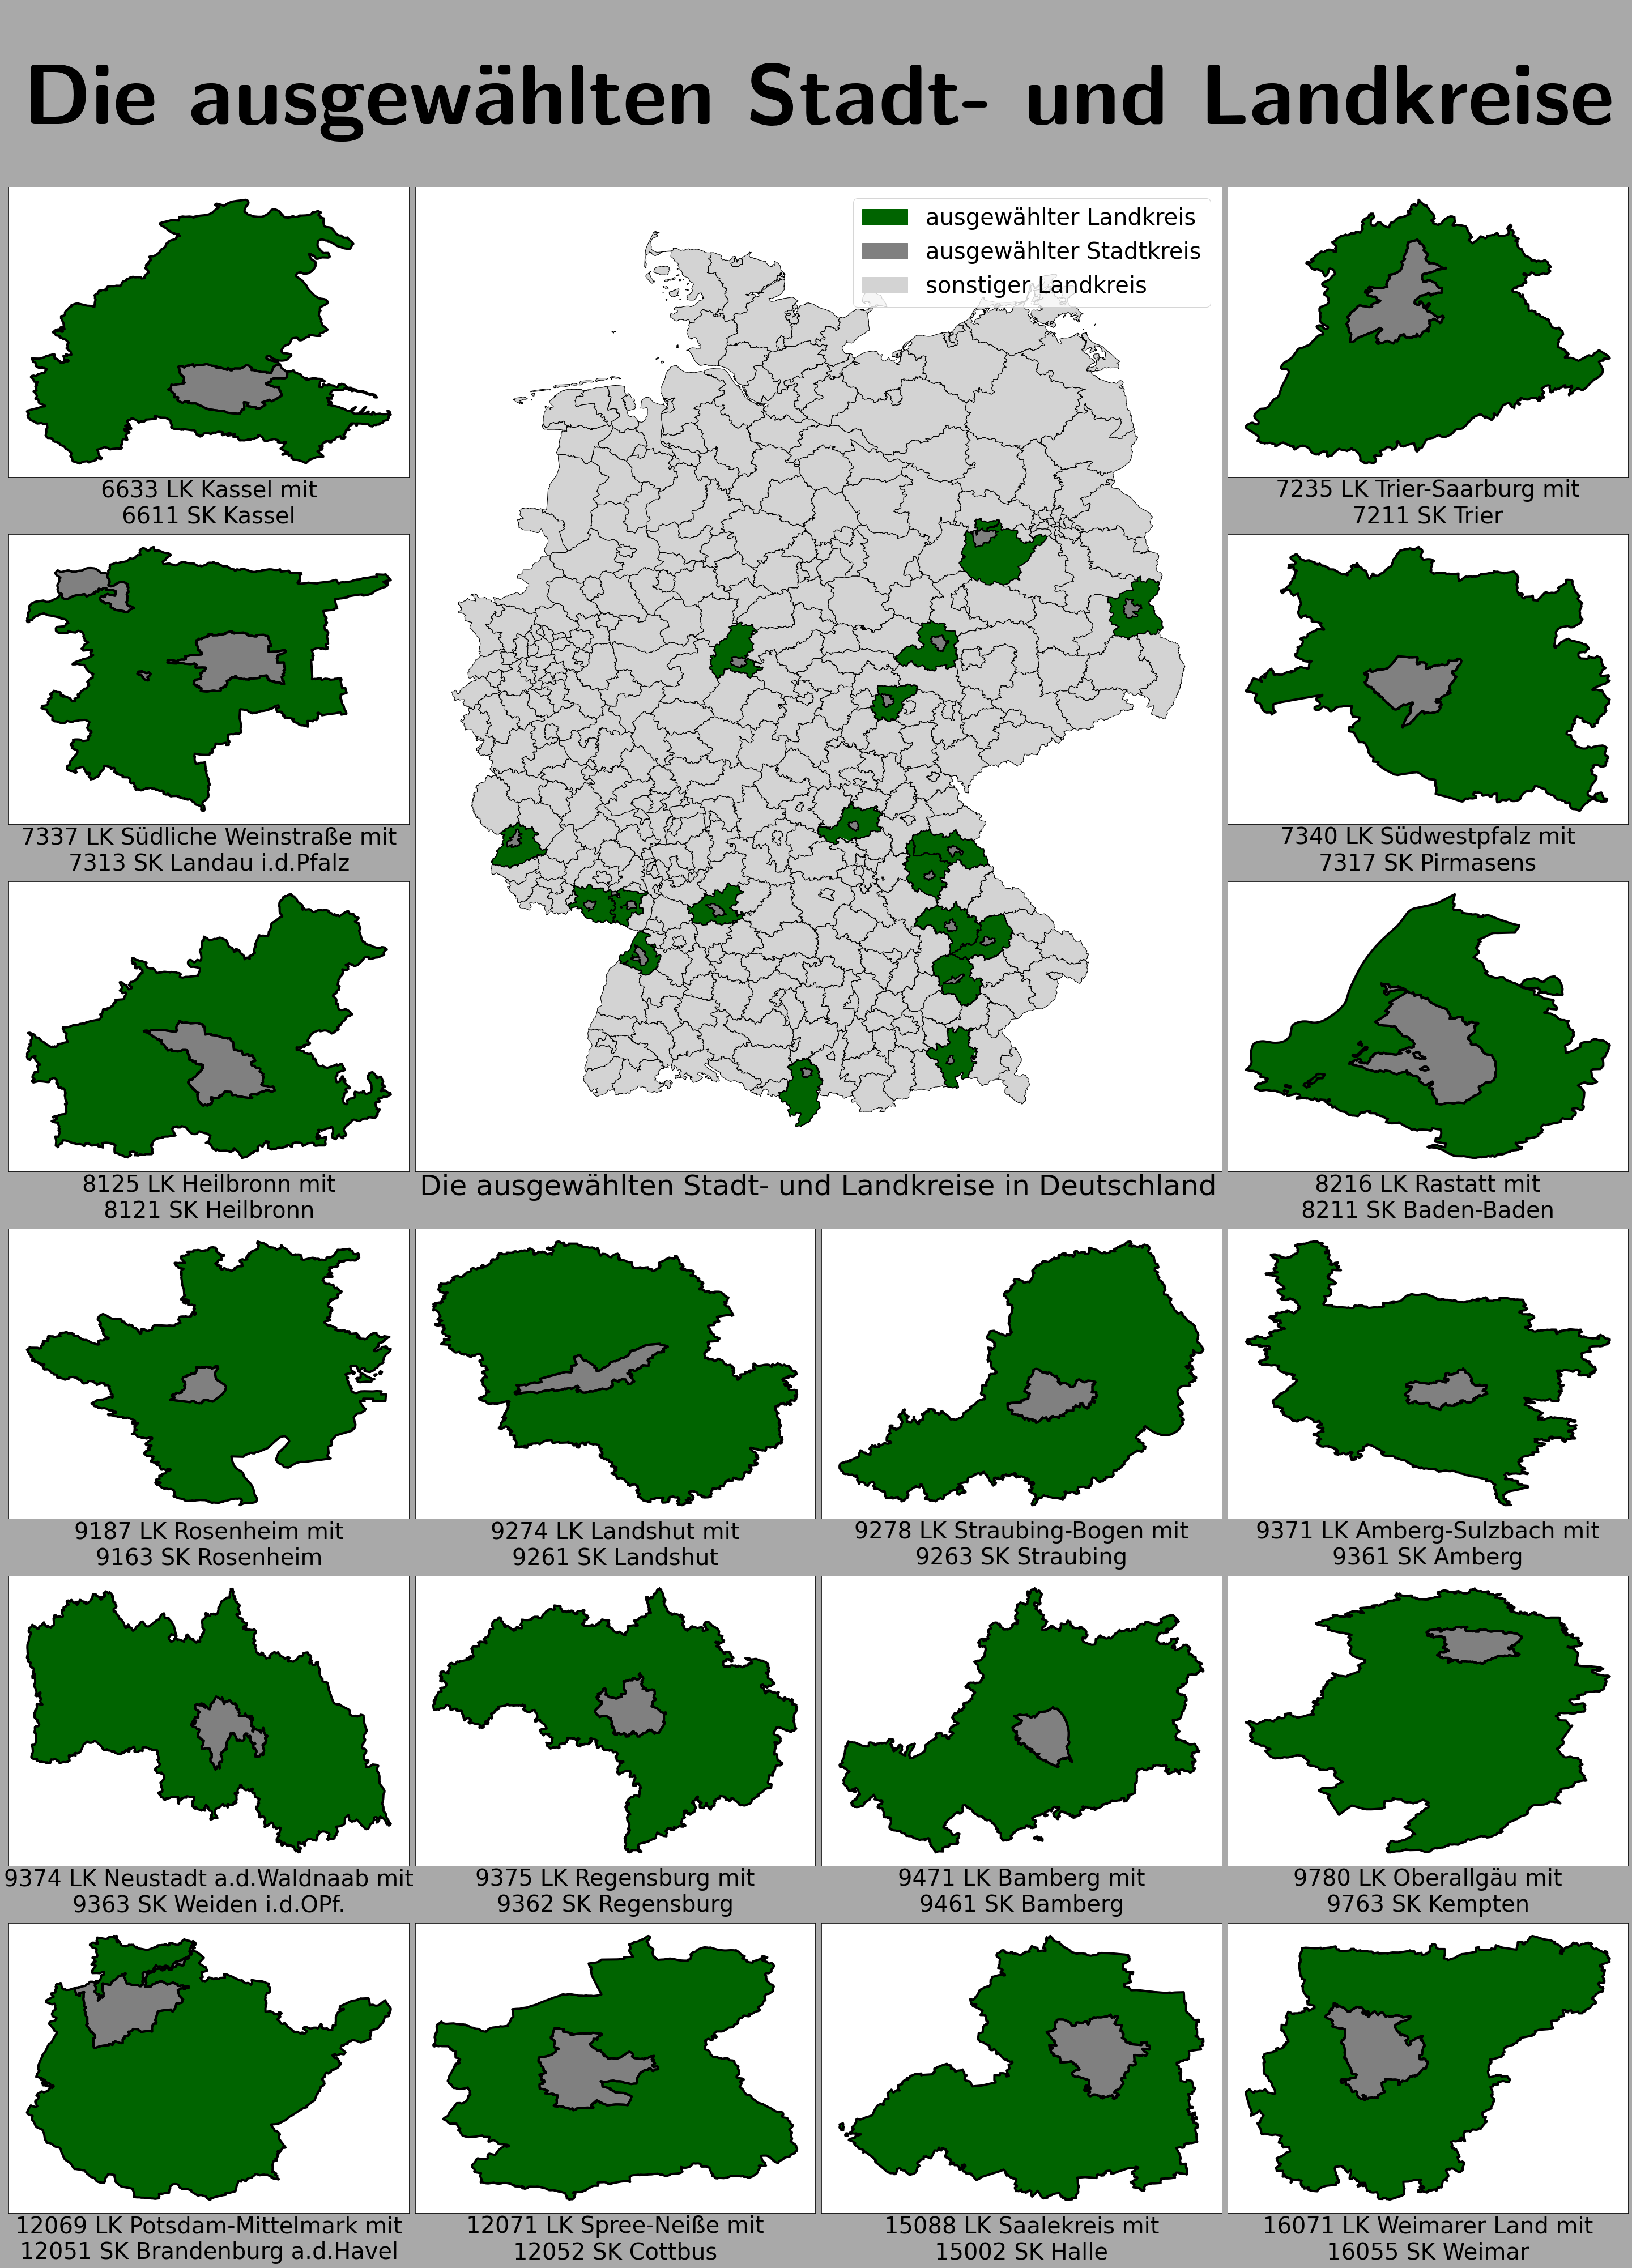

In [6]:
fig, ax = plt.subplots(6, 4, figsize = (40, 55), facecolor='darkgrey')
plt.sca(ax[0][0])

# map of Germany
gs = ax[0][0].get_gridspec()
# remove the underlying axes
for row in ax[:3]:
    for axis in row[1:3]:
        axis.remove()
bigaxis = fig.add_subplot(gs[:3, 1:3])
first_element = True
for AdmUnitId, county in covid19.items():
    bigaxis.set_title(r"\textbf{\underline{{Die ausgewählten Stadt- und Landkreise}}",
        fontsize=152, usetex=True, y=1.06)
    bigaxis.text(10,57," ")    # for some space above the title
    bigaxis.set_xlabel("Die ausgewählten Stadt- und Landkreise in Deutschland",
                    fontsize=50)
    bigaxis.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    if AdmUnitId in selected_counties.keys():
        for polygon in counties_geography[AdmUnitId]['geometry']:
            x, y = np.array(polygon).T
            bigaxis.fill(x, y, color="darkgreen")
        for polygon in counties_geography[AdmUnitId]['raw_geometry']:
            x, y = np.array(polygon).T
            bigaxis.plot(x, y, color="black", linewidth=2)
    elif AdmUnitId in selected_counties.values():
        for polygon in counties_geography[AdmUnitId]['raw_geometry']:
            x, y = np.array(polygon).T
            bigaxis.fill(x, y, color="grey")
            bigaxis.plot(x, y, color="black", linewidth=2)
    else:
        for polygon in counties_geography[AdmUnitId]['raw_geometry']:
            x, y = np.array(polygon).T
            bigaxis.plot(x, y, color="black", linewidth=1)
        for polygon in counties_geography[AdmUnitId]['geometry']:
            x, y = np.array(polygon).T
            bigaxis.fill(x, y, color="lightgrey")
            if first_element:
                first_element = False
                bigaxis.fill(x, y, color="darkgreen", label="ausgewählter Landkreis")
                bigaxis.fill(x, y, color="grey", label="ausgewählter Stadtkreis")
                bigaxis.fill(x, y, color="lightgrey", label="sonstiger Landkreis")
bigaxis.legend(loc="upper right", fontsize=40)

i = 0
for county, city in selected_counties.items():
    axis = ax[i//4][i%4]
    axis.set_xlabel("{} {} mit\n{} {}".format(
        county, counties_geography[county]['name'],
        city, counties_geography[city]['name']),
        fontsize=40)
    axis.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    for polygon in counties_geography[county]['raw_geometry']:
        x, y = np.array(polygon).T
        axis.plot(x, y, color="black", linewidth=4)
        axis.fill(x, y, color="darkgreen")
    for polygon in counties_geography[city]['raw_geometry']:
        x, y = np.array(polygon).T
        axis.plot(x, y, color="black", linewidth=4)
        axis.fill(x, y, color="grey")
    if i == 0 or i == 4 or i == 8: i+=2
    i+=1


os.chdir(".."), os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Vorgehensweise")): os.makedirs("results/Vorgehensweise")
plt.tight_layout()
plt.savefig("results/Vorgehensweise/selected_counties.png")
os.chdir(cor_mx_selected_counties_directory)    # return to original directory

{0: ['LK Kassel (6633) mit SK Kassel (6611)', 'LK Südliche Weinstraße (7337) mit SK Landau i.d.Pfalz (7313)', 'LK Heilbronn (8125) mit SK Heilbronn (8121)', 'LK Rastatt (8216) mit SK Baden-Baden (8211)', 'LK Rosenheim (9187) mit SK Rosenheim (9163)', 'LK Landshut (9274) mit SK Landshut (9261)', 'LK Straubing-Bogen (9278) mit SK Straubing (9263)', 'LK Neustadt a.d.Waldnaab (9374) mit SK Weiden i.d.OPf. (9363)', 'LK Oberallgäu (9780) mit SK Kempten (9763)'], 3: ['LK Trier-Saarburg (7235) mit SK Trier (7211)', 'LK Regensburg (9375) mit SK Regensburg (9362)'], -2: ['LK Südwestpfalz (7340) mit SK Pirmasens (7317)'], 1: ['LK Amberg-Sulzbach (9371) mit SK Amberg (9361)', 'LK Saalekreis (15088) mit SK Halle (15002)', 'LK Weimarer Land (16071) mit SK Weimar (16055)'], 8: ['LK Bamberg (9471) mit SK Bamberg (9461)'], -4: ['LK Potsdam-Mittelmark (12069) mit SK Brandenburg a.d.Havel (12051)'], -6: ['LK Spree-Neiße (12071) mit SK Cottbus (12052)']}


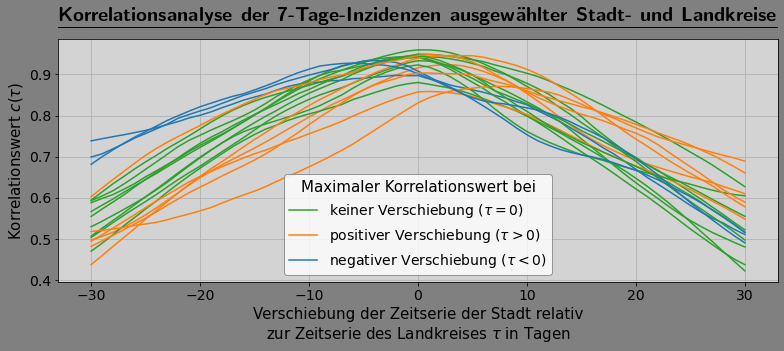

In [7]:
__, ax = plt.subplots(figsize=(11, 5), facecolor="grey")    # initiate and enlarge plot
ax.set_facecolor('lightgrey')
city_after_county = list()
city_equal_to_county = list()
county_after_city = list()
plt.title(r"\textbf{\underline{Korrelationsanalyse der 7-Tage-Inzidenzen}}"+
          r"\textbf{\underline{ ausgewählter Stadt- und Landkreise}}",
         usetex=True, fontsize=20, y=1.05)
first_blue, first_green, first_red = True, True, True
maximums = dict()
for county, city in selected_counties.items():
    label=None
    max_correlation_i = np.argmax(covid19[county]["correlation"][city])-50
    if max_correlation_i not in maximums.keys():
        maximums[max_correlation_i] = list()
    maximums[max_correlation_i].append(
        counties_geography[county]["name"] + " (" + county + ") mit " +
        counties_geography[city]["name"] + " (" + city + ")"
    )
    if  max_correlation_i > 0:
        colour="tab:orange"
        city_after_county.append( max_correlation_i)
        if first_red:
            first_red = False
            label = r"positiver Verschiebung ($\tau > 0$)"
    elif  max_correlation_i == 0:
        colour="tab:green"
        city_equal_to_county.append(max_correlation_i)
        if first_green:
            first_green = False
            label = r"keiner Verschiebung ($\tau = 0$)"
    else:
        colour="tab:blue"
        county_after_city.append(max_correlation_i)
        if first_blue:
            first_blue = False
            label = r"negativer Verschiebung ($\tau < 0$)"
    plt.plot([e for e in range(-30, 31)], covid19[county]["correlation"][city][20:81],
            color=colour, linewidth=1.5, label=label)
print(maximums)
plt.legend(title="Maximaler Korrelationswert bei", title_fontsize=15, fontsize=14,
          edgecolor="grey")


plt.ylabel(r"Korrelationswert $c(\tau)$", fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel("Verschiebung der Zeitserie der Stadt relativ\n" +
           r"zur Zeitserie des Landkreises $\tau$ in Tagen", fontsize=15)
plt.yticks(fontsize=14)
plt.grid()
os.chdir(".."), os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Ergebnisse")): os.makedirs("results/Ergebnisse")
plt.tight_layout()
plt.savefig("results/Ergebnisse/highest_selected_counties.png")
os.chdir(cor_mx_selected_counties_directory)    # return to original directory

In [8]:
probabilities_average_30=list()
for county, city in selected_counties.items():
    correlation = covid19[county]["correlation"][city]
    lc = len(correlation)//2
    probabilities_average_30.append((sum(correlation[lc+1:lc+31])-
          sum(correlation[lc-30:lc]))/(len(correlation[lc+1:lc+31])))
probabilities_average_30.sort()

probabilities_average_14=list()
for county, city in selected_counties.items():
    correlation = covid19[county]["correlation"][city]
    lc = len(correlation)//2
    probabilities_average_14.append((sum(correlation[lc+1:lc+15])-
          sum(correlation[lc-14:lc]))/len(correlation[lc+1:lc+15]))
probabilities_average_14.sort()

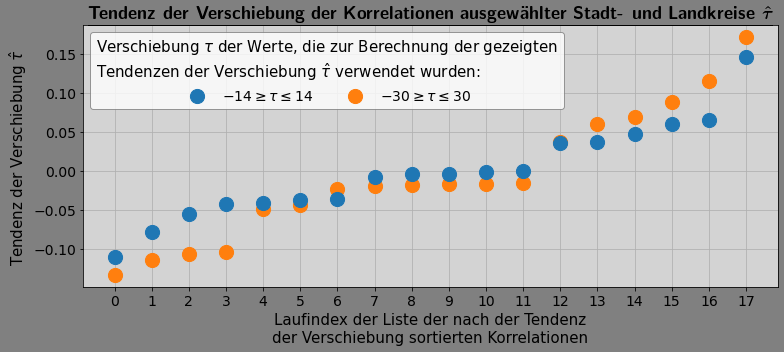

In [9]:
__, ax = plt.subplots(figsize=(11, 5), facecolor="grey")    # initiate and enlarge plot
ax.set_facecolor('lightgrey')
plt.ylabel(r"Tendenz der Verschiebung $\hat{\tau}$", fontsize=15)
plt.yticks(fontsize=14)
plt.xlabel("Laufindex der Liste der nach der Tendenz" + "\n" +
           "der Verschiebung sortierten Korrelationen", fontsize=15)
plt.xticks([e for e in range(len(probabilities_average_30))],
           [e for e in range(len(probabilities_average_30))], fontsize=14)
plt.title(r"\textbf{\underline{Tendenz der Verschiebung der Korrelationen }}" +
          r"\textbf{\underline{ausgewählter Stadt- und Landkreise " +
          r"$\boldsymbol{\hat{\tau}}$}}",
         fontsize=18, usetex=True)#, y=1.06, x=0.445e)
plt.scatter([e for e in range(len(probabilities_average_14))],
            probabilities_average_14,s=200, zorder=5, label=r"$-14\geq\tau\leq14$")
plt.scatter([e for e in range(len(probabilities_average_30))],
            probabilities_average_30,s=200, zorder=4, label=r"$-30\geq\tau\leq30$")
plt.grid()
plt.legend(title=r"Verschiebung $\tau$ der Werte, die zur Berechnung der gezeigten "+
           "\n"+
           r"Tendenzen der Verschiebung $\hat{\tau}$ verwendet wurden:",
          title_fontsize=15, fontsize=14, ncol=3, edgecolor="grey")

os.chdir(".."), os.chdir(".."), os.chdir("..")    # move to correct directory
# check if the needed directory is available - otherwise create it
if not(os.path.isdir("results")): os.makedirs("results")
if not(os.path.isdir("results/Ergebnisse")): os.makedirs("results/Ergebnisse")
plt.tight_layout()
plt.savefig("results/Ergebnisse/sum_selected_counties.png")
os.chdir(cor_mx_selected_counties_directory)    # return to original directory